## Specific humidity - hus

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

### one dataset

In [3]:
variable = 'hus'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:hus, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 8, time: 10950, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hus      (time, plev, lat, lon) float32 ...

In [4]:
hus_day = ds[variable]
hus_day

<xarray.DataArray 'hus' (time: 10950, plev: 8, lat: 22, lon: 128)>
[246681600 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

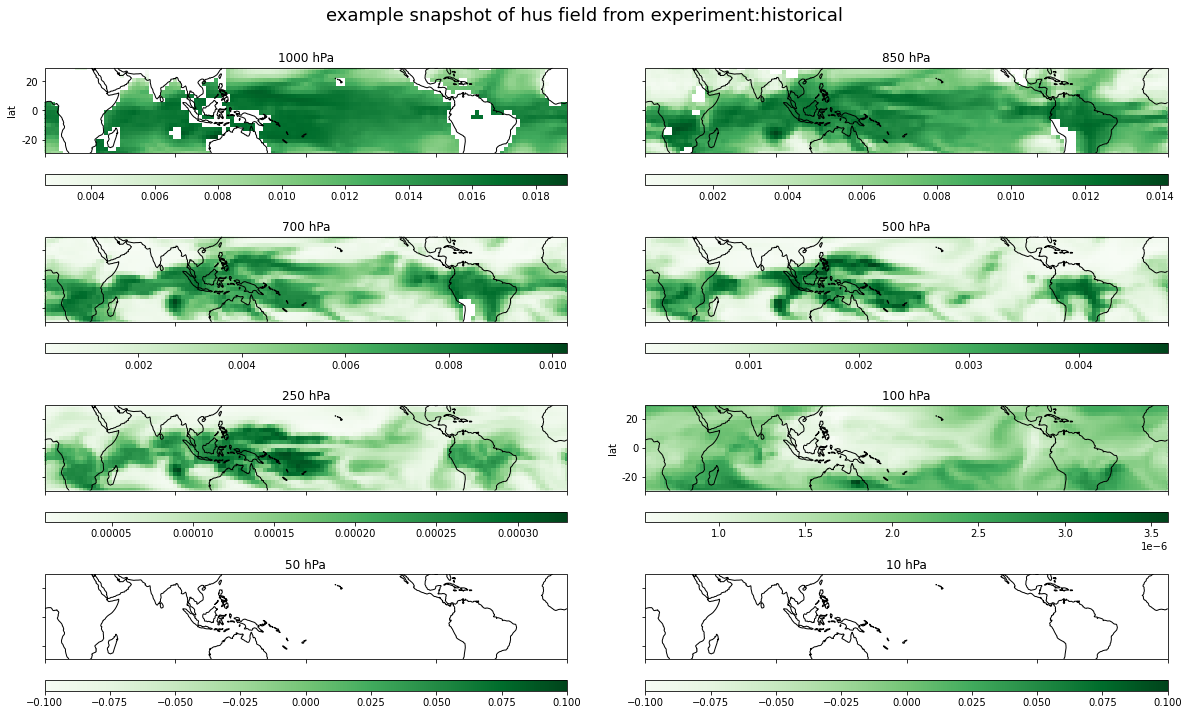

In [5]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(hus_day['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


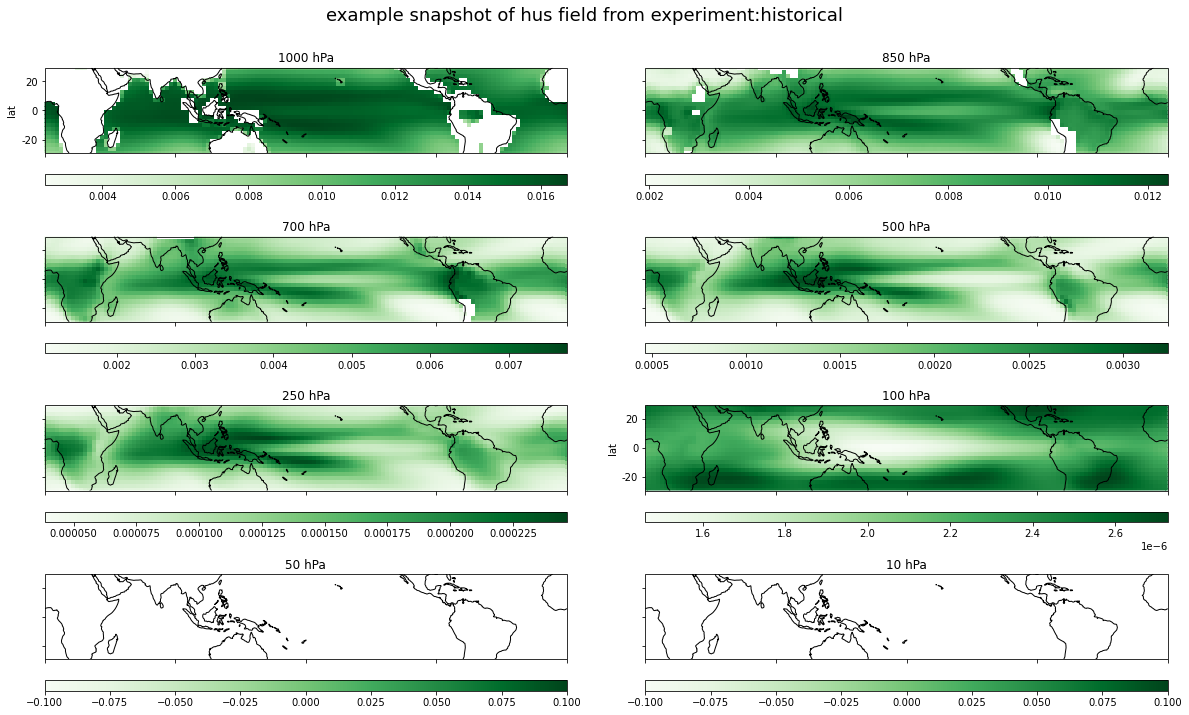

In [6]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(hus_day['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].mean(dim='time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


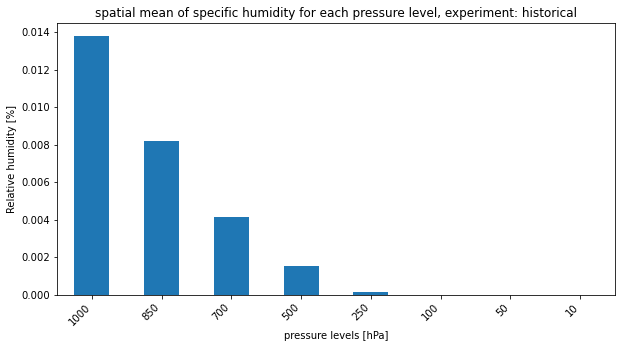

In [7]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
ds['hus'].weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of specific humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hus'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

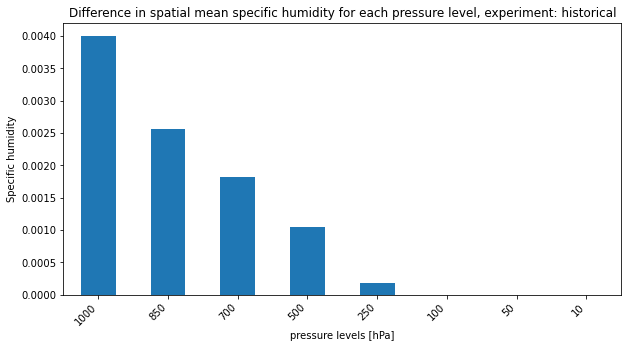

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))

hus_historical = get_dsvariable(variable, datasets[0], experiment = 'historical', resolution=resolutions[0])['hus']
hus_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])['hus'] 

hur_diff = xr.DataArray(
    data=hus_rcp.data - hus_historical.data,
    dims=['time', 'plev','lat', 'lon'],
    coords={'time':hus_historical.time.data, 'plev':hus_historical.plev.data, 'lat': hus_historical.lat.data, 'lon': hus_historical.lon.data}
    )

hur_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('Difference in spatial mean specific humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Specific humidity')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hus'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [19]:
hus_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])
hus_rcp

<xarray.Dataset>
Dimensions:  (plev: 8, time: 10950, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 2070-01-01 12:00:00 ... 2099-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Data variables:
    *empty*

### free troposphere (<=850 hpa) (precipitable water)

In [ ]:
# similar to relative humidity there are many missing values over land at the 1000 hPa level. The mountains are missing, but we can fill that with zero.

In [14]:
import scipy

In [15]:
hus = ds['hus'].sel(plev=slice(850e2,0)).fillna(0)

g = 9.8
hus = xr.DataArray(
    data= -scipy.integrate.simpson(hus.data, hus.plev.data, axis=1, even='last')/g,
    dims=['time','lat', 'lon'],
    coords={'time': hus.time.data, 'lat': hus.lat.data, 'lon': hus.lon.data},
    attrs={'units':'mm',
            'Description': 'precipitable water from 850-0 hpa'}
    )
hus

<xarray.DataArray (time: 10950, lat: 22, lon: 128)>
array([[[ 5.76216501,  5.44602681,  4.991741  , ...,  7.86523546,
          6.90641754,  6.22673042],
        [ 8.31526368,  8.8052164 ,  9.02521954, ...,  8.19560539,
          7.91285742,  7.90662002],
        [15.99003847, 16.45197091, 17.21483989, ..., 11.59789954,
         13.61265104, 15.25914329],
        ...,
        [ 4.66451587,  4.09163833,  3.4771078 , ...,  2.45608692,
          2.93883191,  4.03722273],
        [ 4.26762126,  6.27211626,  6.97203773, ...,  1.74542123,
          1.83418615,  2.35240756],
        [ 2.39699442,  3.24790328,  5.03179055, ...,  1.92955799,
          2.25597872,  2.30381386]],

       [[ 4.2690278 ,  4.07056536,  4.19746519, ...,  6.54440207,
          5.49658298,  4.76271063],
        [ 4.29827345,  3.84108626,  3.58086838, ...,  9.17895833,
          6.50681498,  5.05923288],
        [ 7.38958705,  5.72041239,  4.74298895, ..., 15.12213272,
         12.43853849,  9.7127485 ],
...
        [ 3.90698252,  4.40583627,  5.39542098, ...,  3.98183331,
          3.99536732,  3.94192035],
        [ 4.75875473,  5.23744382,  6.02445904, ...,  4.75113738,
          4.73768054,  4.6971823 ],
        [ 6.52724359,  7.22299192,  7.71626066, ...,  6.64361573,
          6.4622822 ,  6.30746217]],

       [[ 6.31741539,  5.33107778,  4.42343602, ...,  9.8917893 ,
          9.66871366,  7.86931776],
        [ 6.53068697,  5.95489952,  5.09926019, ...,  9.28482263,
          8.72559568,  7.37372762],
        [ 5.89028955,  5.24951448,  4.43445228, ...,  7.90073292,
          7.31742848,  6.5502004 ],
        ...,
        [ 3.87091778,  3.74853896,  3.99523811, ...,  4.08585031,
          4.04839478,  4.05651063],
        [ 4.52979138,  4.58335895,  4.66473855, ...,  4.62042484,
          4.43440707,  4.43888307],
        [ 4.65914735,  5.01783413,  5.32407169, ...,  3.49160164,
          3.85523348,  4.21318903]]])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:        mm
    Description:  precipitable water from 850-0 hpa

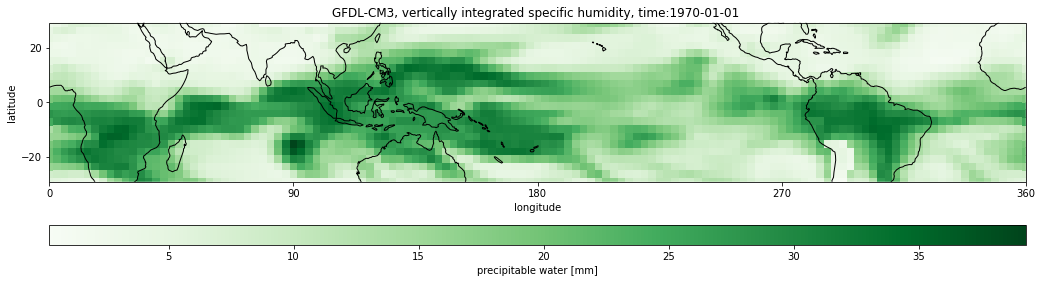

In [20]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hus.isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically integrated specific humidity, time:' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precipitable water' + ' [{}]'.format(scene.attrs['units']))

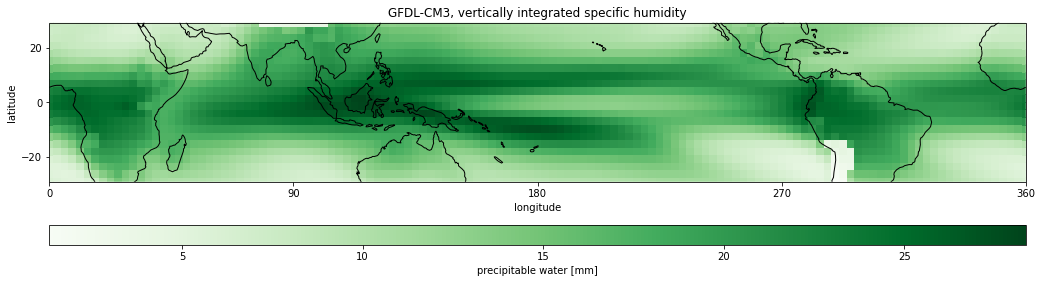

In [19]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hus.mean(dim='time')

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically integrated specific humidity')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precipitable water' + ' [{}]'.format(hus.attrs['units']))

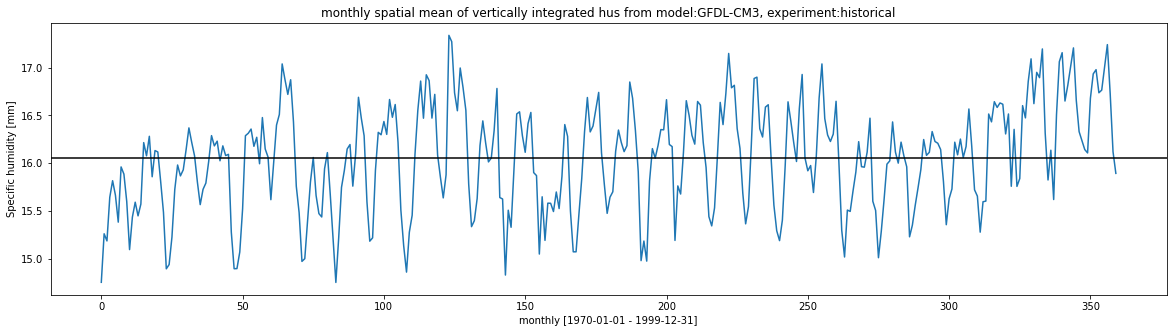

In [22]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(hus.lat))
y= hus.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'vertically integrated hus', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(hus.isel(time=0).coords['time'].values)[:10], str(hus.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Precipitable water', hus.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()